# Importing Dependencies

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic',
 'anagrams',
 'anagrams',
 'anscombe',
 'anscombe',
 'attention',
 'attention',
 'brain_networks',
 'brain_networks',
 'car_crashes',
 'car_crashes',
 'diamonds',
 'diamonds',
 'dots',
 'dots',
 'dowjones',
 'dowjones',
 'exercise',
 'exercise',
 'flights',
 'flights',
 'fmri',
 'fmri',
 'geyser',
 'geyser',
 'glue',
 'glue',
 'healthexp',
 'healthexp',
 'iris',
 'iris',
 'mpg',
 'mpg',
 'penguins',
 'penguins',
 'planets',
 'planets',
 'seaice',
 'seaice',
 'taxis',
 'taxis',
 'tips',
 'tips',
 'titanic',
 'titanic',
 'anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'plan

In [4]:
data = sns.load_dataset('flights')
data.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [10]:
data['date'] = pd.to_datetime('01-'+data['month'].astype(str)+'-'+data['year'].astype(str))

data.set_index('date', inplace = True)

In [11]:
data.head()

,year,month,passengers
date,,,
1949-01-01,1949,Jan,112
1949-02-01,1949,Feb,118
1949-03-01,1949,Mar,132
1949-04-01,1949,Apr,129
1949-05-01,1949,May,121


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 3.9 KB


<Axes: xlabel='date', ylabel='passengers'>

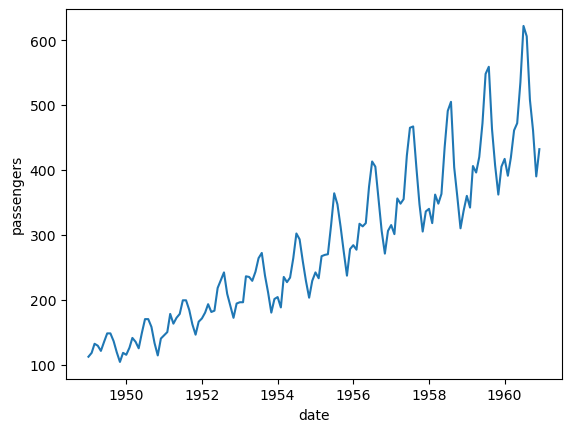

In [13]:
sns.lineplot(data = data, x=data.index, y= data.passengers)

### Checking stationarity

In [14]:
# performing rolling statistics
#rolling the average by 12 months

data['rollmean'] = data.passengers.rolling(window=12).mean()
data['rollstd'] = data.passengers.rolling(window=12).std()

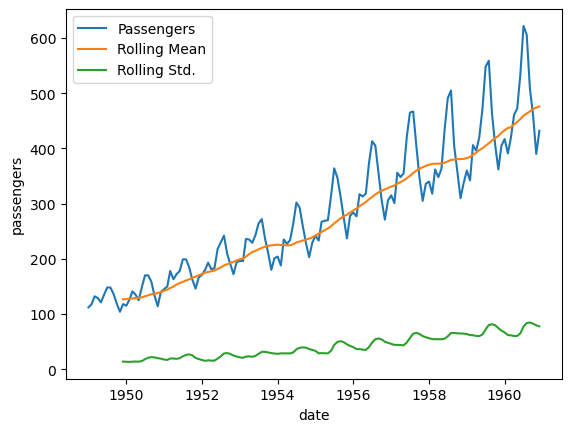

In [19]:
sns.lineplot(data=data, x=data.index, y= data.passengers, label = 'Passengers')
sns.lineplot(data=data, x=data.index, y= data.rollmean, label = 'Rolling Mean')
sns.lineplot(data=data, x=data.index, y= data.rollstd, label = 'Rolling Std.')
plt.legend()

std is approx stationary while mean is not stationary. ie, the mean is not constant and it is showing trend pattern. Therefore data is not stationary

In [20]:
#Second test - Augmented Dickey-Fuller Test

from statsmodels.tsa.stattools import adfuller

In [21]:
AdfTest = adfuller(data['passengers'], autolag = 'AIC')

In [22]:
AdfTest

(0.8153688792060597,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [26]:
# Create a pandas Series from the test results
stats = pd.Series(AdfTest[0:4], index=['Test Statistic', 'p-value', '#lags used', 'number of observations used'])

# Display the Series
print(stats)

Test Statistic                   0.815369
p-value                          0.991880
#lags used                      13.000000
number of observations used    130.000000
dtype: float64


In [27]:
for key, values in AdfTest[4].items():
    print('criticality',key,":",values)

criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


Critical values < test statistics, therefore data is NOT stationary

### Handling Stationarity

In [33]:
# making a function of the tests

def test_stationarity(dataFrame, var):
    dataFrame['rollmean']  = dataFrame[var].rolling(window=12).mean()
    dataFrame['rollstd']  = dataFrame[var].rolling(window=12).std()
    
    from statsmodels.tsa.stattools import adfuller
    AdfTest = adfuller(dataFrame[var],autolag='AIC')
    stats = pd.Series(AdfTest[0:4], index=['Test Statistic', 'p-value', '#lags used', 'number of observations used'])
    print(stats)
    
    for key, values in AdfTest[4].items():
        print('criticality',key,":",values)
        
    sns.lineplot(data=dataFrame,x=dataFrame.index,y=var)
    sns.lineplot(data=data, x=data.index, y= data.rollmean, label = 'Rolling Mean')
    sns.lineplot(data=data, x=data.index, y= data.rollstd, label = 'Rolling Std.')
    plt.legend()

In [35]:
data.head()

,year,month,passengers,rollmean,rollstd
date,,,,,
1949-01-01,1949,Jan,112,NaN,NaN
1949-02-01,1949,Feb,118,NaN,NaN
1949-03-01,1949,Mar,132,NaN,NaN
1949-04-01,1949,Apr,129,NaN,NaN
1949-05-01,1949,May,121,NaN,NaN


In [36]:
air_data = data[['passengers']]
air_data.head()

,passengers
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


#### Method 1:  Time Shift

In [39]:
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

air_data['shift'] = air_data.passengers.shift() #shifting by 1 month
air_data['shiftDiff'] = air_data['passengers'] - air_data['shift'] # finding the difference
air_data.head()

,passengers,shift,shiftDiff
date,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,112.0,6.0
1949-03-01,132,118.0,14.0
1949-04-01,129,132.0,-3.0
1949-05-01,121,129.0,-8.0


Test Statistic                  -2.829267
p-value                          0.054213
#lags used                      12.000000
number of observations used    130.000000
dtype: float64
criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


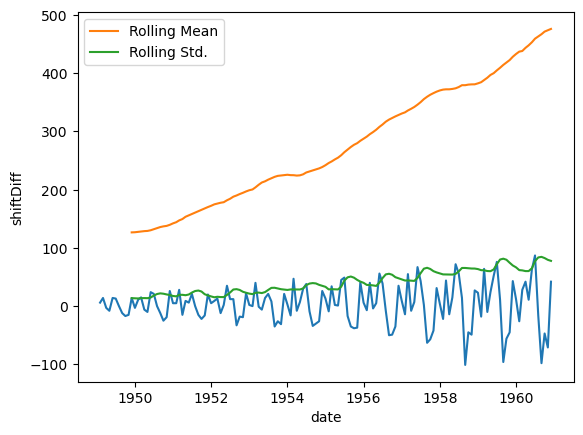

In [40]:
test_stationarity(air_data.dropna(),'shiftDiff')

### Method 2 : Log Transformation